In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")

print("✅ دیتاست تایتانیک با موفقیت بارگذاری شد :")


✅ دیتاست تایتانیک با موفقیت بارگذاری شد :


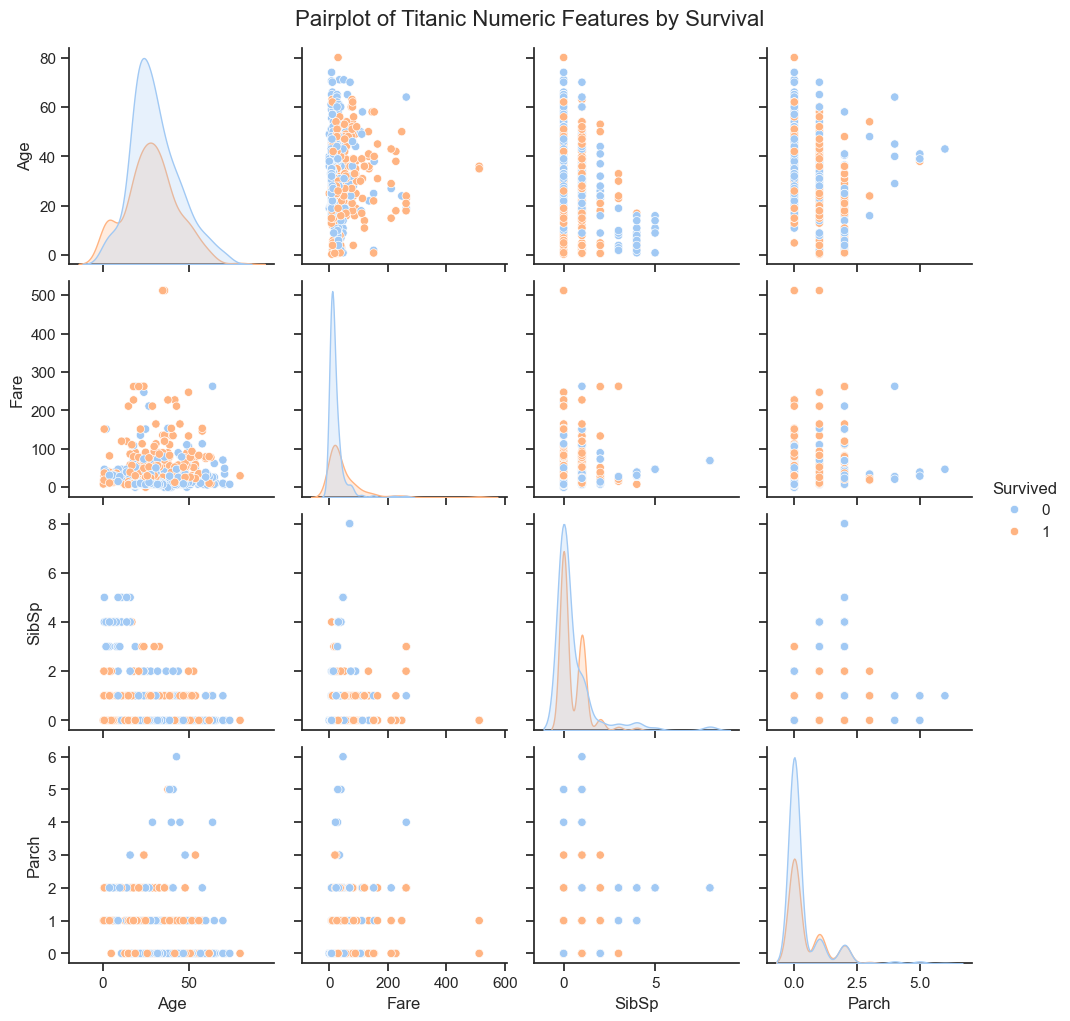

🔍 نمودار جفتی روابط کلی بین سن، کرایه و تعداد اعضای خانواده را نشان می‌دهد.


In [ ]:
numeric_cols = ["Age", "Fare", "SibSp", "Parch", "Survived"]
sns.pairplot(df[numeric_cols], hue="Survived")
plt.suptitle("Pairplot of Titanic Numeric Features by Survival", fontsize=16, y=1.02)
plt.show()

print("🔍 نمودار  روابط کلی بین سن، کرایه و تعداد اعضای خانواده را نشان می‌دهد.")

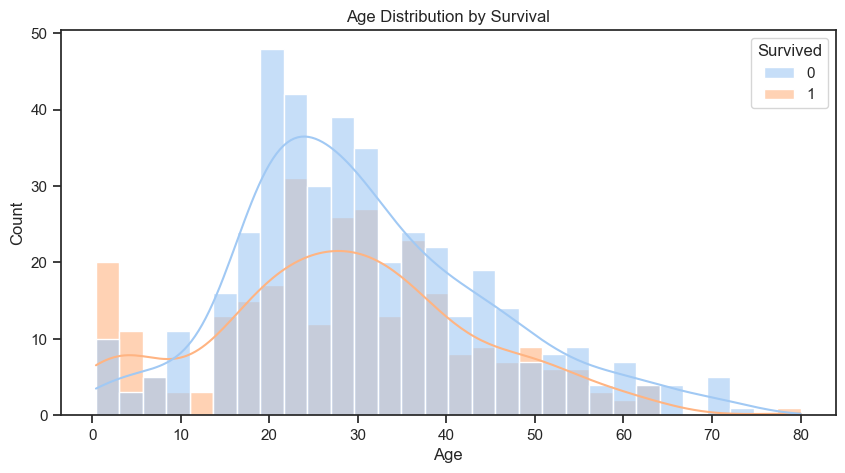

این هیستوگرام نشان می‌دهد که مسافران جوان‌تر شانس زنده ماندن بیشتری داشتند، در حالی که مسافران مسن‌تر شانس کمتری داشتند.


In [33]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Age", hue="Survived", bins=30, kde=True, alpha=0.6)
plt.title("Age Distribution by Survival")
plt.show()

print("این هیستوگرام نشان می‌دهد که مسافران جوان‌تر شانس زنده ماندن بیشتری داشتند، در حالی که مسافران مسن‌تر شانس کمتری داشتند.")


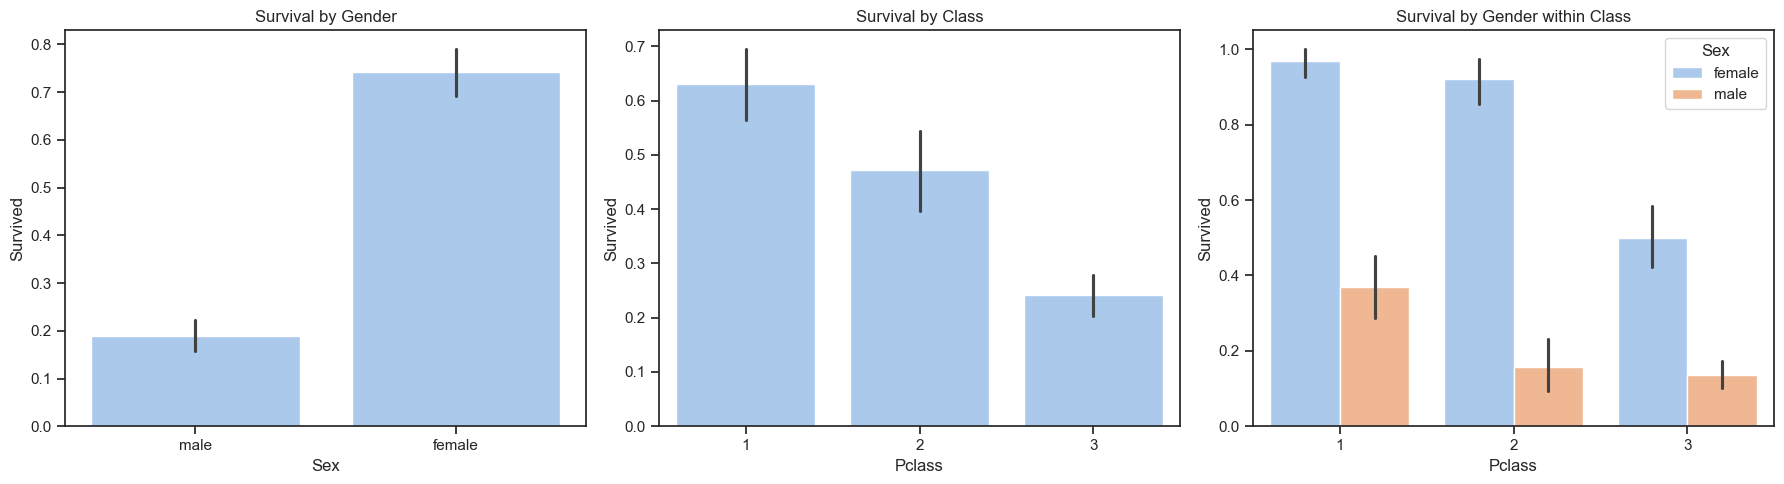

نمودارها نشان می‌دهند که زنده ماندن تحت تأثیر جنسیت و کلاس قرار دارد. زنان به طور کلی شانس زنده ماندن بیشتری داشتند، مسافران کلاس اول شانس بالاتری داشتند و ترکیب این دو نشان می‌دهد که زنان کلاس اول بیشترین شانس زنده ماندن و مردان کلاس سوم کمترین شانس را داشتند.


In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.barplot(x="Sex", y="Survived", data=df, ax=axes[0])
axes[0].set_title("Survival by Gender")

sns.barplot(x="Pclass", y="Survived", data=df, ax=axes[1])
axes[1].set_title("Survival by Class")

sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df, ax=axes[2])
axes[2].set_title("Survival by Gender within Class")

plt.tight_layout()
plt.show()

print("نمودارها نشان می‌دهند که زنده ماندن تحت تأثیر جنسیت و کلاس قرار دارد. زنان به طور کلی شانس زنده ماندن بیشتری داشتند، مسافران کلاس اول شانس بالاتری داشتند و ترکیب این دو نشان می‌دهد که زنان کلاس اول بیشترین شانس زنده ماندن و مردان کلاس سوم کمترین شانس را داشتند.")


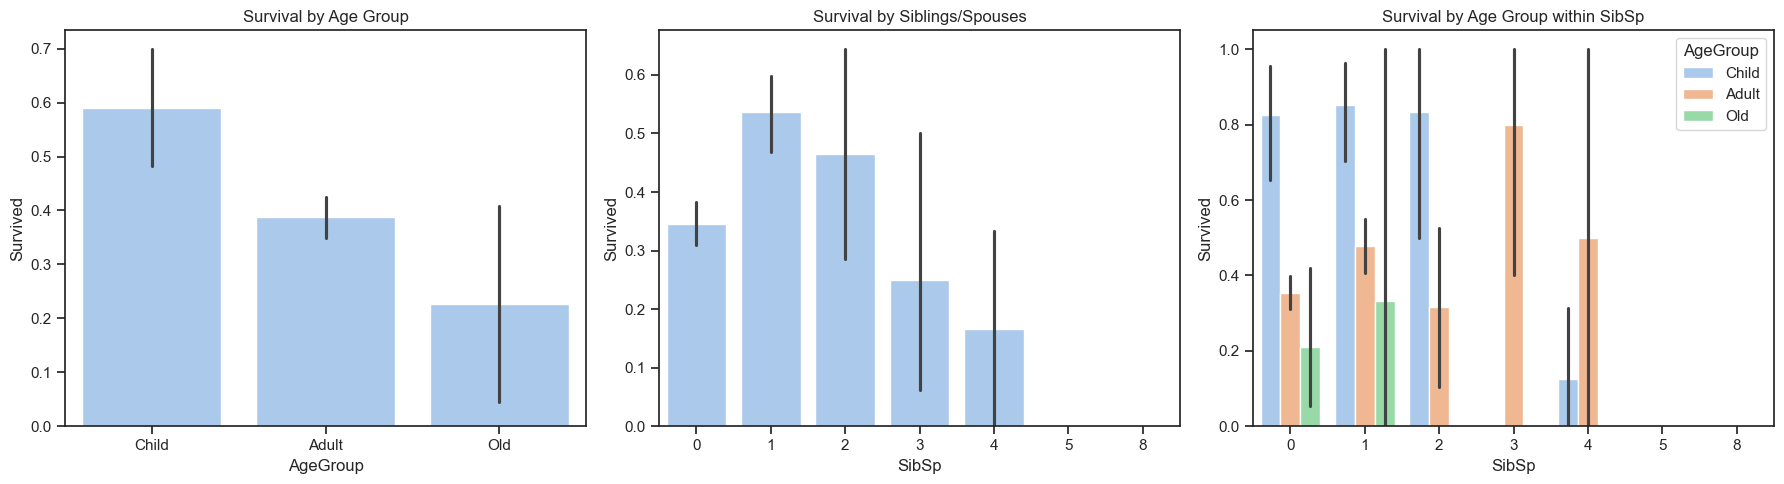

کودکان شانس زنده ماندن بالاتری نسبت به بزرگسالان داشتند. داشتن تعداد بیشتر خواهر/برادر یا همسر معمولاً شانس زنده ماندن را کاهش می‌دهد، اما ترکیب این دو نشان می‌دهد که کودکان با ۱ تا ۲ عضو خانواده بهترین شانس را داشتند، در حالی که بزرگسالان با خانواده‌های بزرگ کمترین شانس را داشتند.


In [35]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 15, 60, 80], labels=['Child','Adult','Old'])

fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.barplot(x="AgeGroup", y="Survived", data=df, ax=axes[0])
axes[0].set_title("Survival by Age Group")

sns.barplot(x="SibSp", y="Survived", data=df, ax=axes[1])
axes[1].set_title("Survival by Siblings/Spouses")

sns.barplot(x="SibSp", y="Survived", hue="AgeGroup", data=df, ax=axes[2])
axes[2].set_title("Survival by Age Group within SibSp")

plt.tight_layout()
plt.show()

print("کودکان شانس زنده ماندن بالاتری نسبت به بزرگسالان داشتند. داشتن تعداد بیشتر خواهر/برادر یا همسر معمولاً شانس زنده ماندن را کاهش می‌دهد، اما ترکیب این دو نشان می‌دهد که کودکان با ۱ تا ۲ عضو خانواده بهترین شانس را داشتند، در حالی که بزرگسالان با خانواده‌های بزرگ کمترین شانس را داشتند.")


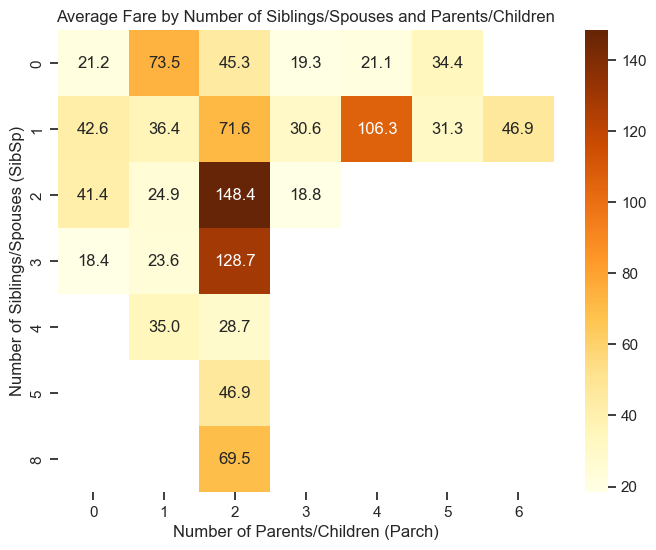

مسافرانی که اعضای خانواده کمتری همراه داشتند  کرایه بالاتری پرداخت کردند، در حالی که خانواده‌های بزرگ‌تر کرایه کمتری پرداخت کردند. این نمودار الگوهای اقتصادی مسافران تایتانیک را نشان می‌دهد.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot = df.pivot_table(values="Fare", index="SibSp", columns="Parch", aggfunc="mean")

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlOrBr")
plt.title("Average Fare by Number of Siblings/Spouses and Parents/Children")
plt.xlabel("Number of Parents/Children (Parch)")
plt.ylabel("Number of Siblings/Spouses (SibSp)")
plt.show()

print("مسافرانی که اعضای خانواده کمتری همراه داشتند  کرایه بالاتری پرداخت کردند، در حالی که خانواده‌های بزرگ‌تر کرایه کمتری پرداخت کردند. این نمودار الگوهای اقتصادی مسافران تایتانیک را نشان می‌دهد.")


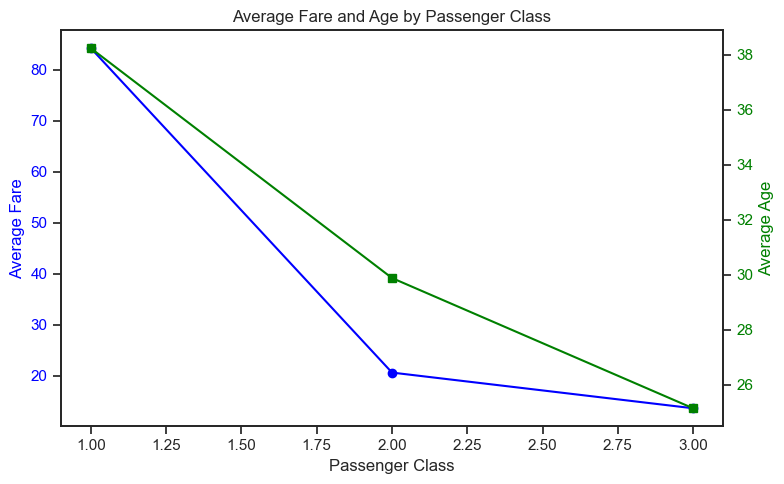

این نمودار نشان می‌دهد که مسافران کلاس اول میانگین کرایه بالاتر و سن بیشتری داشتند، در حالی که مسافران کلاس سوم میانگین کرایه پایین‌تر و سن کمتری داشتند. این الگو بازتاب‌دهنده تفاوت‌های اقتصادی و جمعیتی بین مسافران تایتانیک است.


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

avg_stats = df.groupby('Pclass')[['Fare', 'Age']].mean()

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(avg_stats.index, avg_stats['Fare'], marker='o', color='blue', label='Average Fare')
ax1.set_xlabel('Passenger Class')
ax1.set_ylabel('Average Fare', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(avg_stats.index, avg_stats['Age'], marker='s', color='green', label='Average Age')
ax2.set_ylabel('Average Age', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Average Fare and Age by Passenger Class')
plt.tight_layout()
plt.show()

print("این نمودار نشان می‌دهد که مسافران کلاس اول میانگین کرایه بالاتر و سن بیشتری داشتند، در حالی که مسافران کلاس سوم میانگین کرایه پایین‌تر و سن کمتری داشتند. این الگو بازتاب‌دهنده تفاوت‌های اقتصادی و جمعیتی بین مسافران تایتانیک است.")


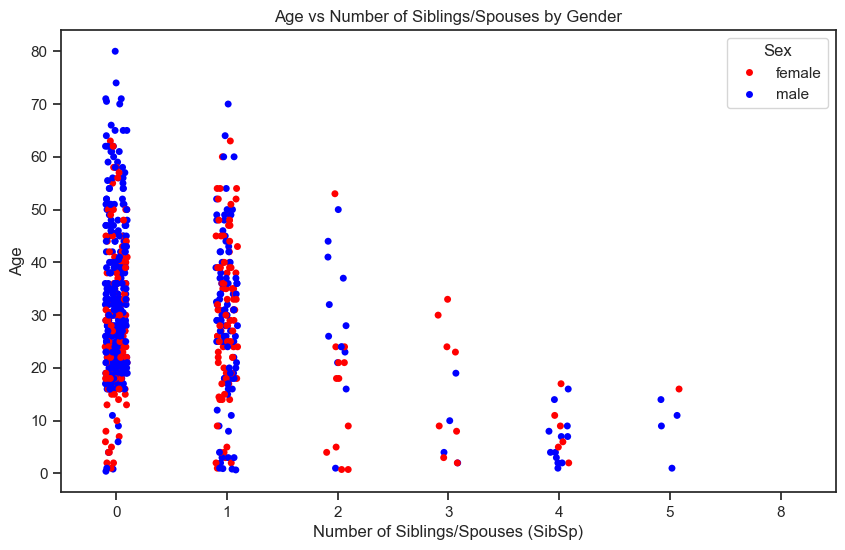

این نمودار نشان می‌دهد که بیشتر کودکان با حداقل یک خواهر/برادر یا همسر سفر می‌کردند، در حالی که بسیاری از زنان بزرگسال تنها سفر کردند. این الگو نحوه سفر گروه‌های سنی و جنسیتی مختلف در تایتانیک را به صورت غیرمستقیم آشکار می‌کند.


In [45]:
plt.figure(figsize=(10,6))
sns.stripplot(x="SibSp", y="Age", data=df, jitter=True, hue="Sex", palette={"male":"blue","female":"red"})
plt.title("Age vs Number of Siblings/Spouses by Gender")
plt.xlabel("Number of Siblings/Spouses (SibSp)")
plt.ylabel("Age")
plt.legend(title="Sex")
plt.show()

print("این نمودار نشان می‌دهد که بیشتر کودکان با حداقل یک خواهر/برادر یا همسر سفر می‌کردند، در حالی که بسیاری از زنان بزرگسال تنها سفر کردند. این الگو نحوه سفر گروه‌های سنی و جنسیتی مختلف در تایتانیک را به صورت غیرمستقیم آشکار می‌کند.")


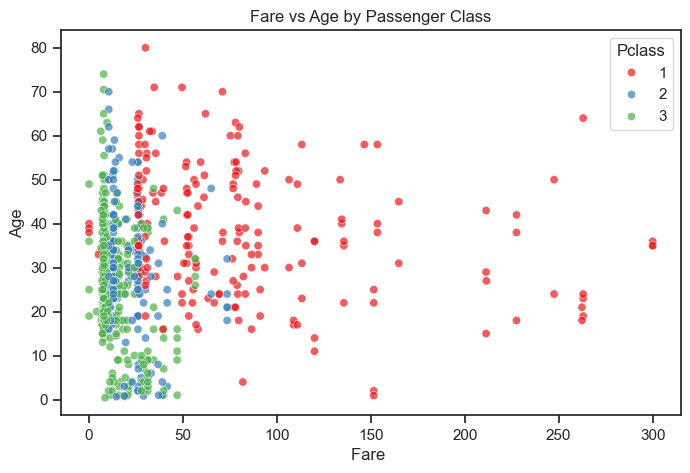

این نمودار نشان می‌دهد که در کلاس سوم، گروه کوچکی از مسافران جوان کرایه‌های بالایی پرداخت کرده‌اند، که معمولاً ثروت با کلاس اول مرتبط است و این الگو به ندرت تحلیل می‌شود.


In [54]:
plt.figure(figsize=(8,5))


df_plot = df.copy()
df_plot["Fare_capped"] = df_plot["Fare"].clip(upper=300)

sns.scatterplot(x="Fare_capped", y="Age", hue="Pclass", data=df_plot, palette="Set1", alpha=0.7)
plt.xlabel("Fare ")
plt.ylabel("Age")
plt.title("Fare vs Age by Passenger Class")
plt.show()

print("این نمودار نشان می‌دهد که در کلاس سوم، گروه کوچکی از مسافران جوان کرایه‌های بالایی پرداخت کرده‌اند، که معمولاً ثروت با کلاس اول مرتبط است و این الگو به ندرت تحلیل می‌شود.")
